Importing Libraries

In [28]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,  precision_score
import matplotlib.pyplot as plt

In [29]:
data = pd.read_csv(r"C:\Users\vinut\Documents\ML_Projects\heart.csv")

In [30]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Data Pre-Processing steps
1.Handle missing values (if any).
2.Encode categorical variables.
3.Standardize numerical features.

In [31]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [32]:
# Encoding 'Sex' column (M -> 1, F -> 0)
data['Sex'] = data['Sex'].map({'M': 1, 'F': 0})

In [33]:
# Encoding 'ChestPainType', 'RestingECG', 'ExerciseAngina', and 'ST_Slope' using LabelEncoder
le = LabelEncoder()
data['ChestPainType'] = le.fit_transform(data['ChestPainType'])
data['RestingECG'] = le.fit_transform(data['RestingECG'])
data['ExerciseAngina'] = data['ExerciseAngina'].map({'Y': 1, 'N': 0})
data['ST_Slope'] = le.fit_transform(data['ST_Slope'])

In [34]:
data.info()
data.drop_duplicates()
data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age          

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


Standardize numerical features

In [35]:
scaler = StandardScaler()
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [36]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,1,1,0.410909,0.825070,0,1,1.382928,0,-0.832432,2,0
1,-0.478484,0,2,1.491752,-0.171961,0,1,0.754157,0,0.105664,1,1
2,-1.751359,1,1,-0.129513,0.770188,0,2,-1.525138,0,-0.832432,2,0
3,-0.584556,0,0,0.302825,0.139040,0,1,-1.132156,1,0.574711,1,1
4,0.051881,1,2,0.951331,-0.034755,0,1,-0.581981,0,-0.832432,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,1,3,-1.210356,0.596393,0,1,-0.188999,0,0.293283,1,1
914,1.536902,1,0,0.627078,-0.053049,1,1,0.164684,0,2.357094,1,1
915,0.370100,1,0,-0.129513,-0.620168,0,1,-0.857069,1,0.293283,1,1
916,0.370100,0,1,-0.129513,0.340275,0,0,1.461525,0,-0.832432,1,1


In [37]:
# Separate features (X) and target (y)
X = data.drop('HeartDisease', axis=1)
Y = data['HeartDisease']

In [38]:
# Step 2: Split data into training and testing sets (80% train, 20% test) with stratification
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [39]:
#prediction using SVM classifier
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, Y_train)

SVC(random_state=42)

In [40]:
# Predict using the trained model
Y_train_pred = svm_model.predict(X_train)
Y_pred = svm_model.predict(X_test)
train_precision_svc = precision_score(Y_train, Y_train_pred)
test_precision_svc = precision_score(Y_test, Y_pred)

In [41]:
#Calculate accuracy for both training and test sets
accuracy_train = accuracy_score(Y_train, Y_train_pred)
accuracy_test = accuracy_score(Y_test, Y_pred)

# Print accuracies
print(f"Accuracy of SVM on training set: {accuracy_train:.2f}")
print(f"Accuracy of SVM on test set: {accuracy_test:.2f}")
print(f'Decision Tree - Training Precision: {train_precision_svc:.2f}')
print(f'Decision Tree - Testing Precision: {test_precision_svc:.2f}')

Accuracy of SVM on training set: 0.89
Accuracy of SVM on test set: 0.89
Decision Tree - Training Precision: 0.89
Decision Tree - Testing Precision: 0.87


In [42]:
#Train a Logistic Regression classifier
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [43]:
#Predict using the trained model
Y_train_pred1 = logreg_model.predict(X_train)
Y_pred1 = logreg_model.predict(X_test)
train_precision_lr = precision_score(Y_train, Y_train_pred1)
test_precision_lr = precision_score(Y_test, Y_pred1)

In [44]:
#Calculate accuracy for both training and test sets
accuracy_train = accuracy_score(Y_train, Y_train_pred1)
accuracy_test = accuracy_score(Y_test, Y_pred1)

In [45]:
#Print accuracies
print(f"Accuracy of Logistic Regression on training set: {accuracy_train:.2f}")
print(f"Accuracy of Logistic Regression on test set: {accuracy_test:.2f}")
print(f'Decision Tree - Training Precision: {train_precision_lr:.2f}')
print(f'Decision Tree - Testing Precision: {test_precision_lr:.2f}')

Accuracy of Logistic Regression on training set: 0.85
Accuracy of Logistic Regression on test set: 0.87
Decision Tree - Training Precision: 0.87
Decision Tree - Testing Precision: 0.85


In [46]:
#Train a RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

# Predict using the trained model
Y_train_pred2 = rf_model.predict(X_train)
Y_pred2 = rf_model.predict(X_test)
train_precision_rf = precision_score(Y_train, Y_train_pred2)
test_precision_rf = precision_score(Y_test, Y_pred2)

# Calculate accuracy for both training and test sets
accuracy_train = accuracy_score(Y_train, Y_train_pred2)
accuracy_test = accuracy_score(Y_test, Y_pred2)

# Print accuracies
print(f"Accuracy of RandomForestClassifier on training set: {accuracy_train:.2f}")
print(f"Accuracy of RandomForestClassifier on test set: {accuracy_test:.2f}")
print(f'Decision Tree - Training Precision: {train_precision_rf:.2f}')
print(f'Decision Tree - Testing Precision: {test_precision_rf:.2f}')

Accuracy of RandomForestClassifier on training set: 1.00
Accuracy of RandomForestClassifier on test set: 0.88
Decision Tree - Training Precision: 1.00
Decision Tree - Testing Precision: 0.88


In [47]:
#Train a K-Nearest Neighbors (KNN) classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, Y_train)

# Step 4: Predict using the trained model
Y_train_pred3 = knn_model.predict(X_train)
Y_pred3 = knn_model.predict(X_test)
train_precision_knn = precision_score(Y_train, Y_train_pred3)
test_precision_knn = precision_score(Y_test, Y_pred3)

# Step 5: Calculate accuracy for both training and test sets
accuracy_train = accuracy_score(Y_train, Y_train_pred3)
accuracy_test = accuracy_score(Y_test, Y_pred3)

#Print accuracies
print(f"Accuracy of K-Nearest Neighbors (KNN) on training set: {accuracy_train:.2f}")
print(f"Accuracy of K-Nearest Neighbors (KNN) on test set: {accuracy_test:.2f}")
print(f'Decision Tree - Training Precision: {train_precision_knn:.2f}')
print(f'Decision Tree - Testing Precision: {test_precision_knn:.2f}')

Accuracy of K-Nearest Neighbors (KNN) on training set: 0.87
Accuracy of K-Nearest Neighbors (KNN) on test set: 0.87
Decision Tree - Training Precision: 0.88
Decision Tree - Testing Precision: 0.88


In [48]:
#Train a Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [49]:
#Predict using the trained model
Y_train_pred4 = dt_model.predict(X_train)
Y_pred4 = dt_model.predict(X_test)
train_precision_dt = precision_score(Y_train, Y_train_pred4)
test_precision_dt = precision_score(Y_test, Y_pred4)

In [50]:
#Calculate accuracy for both training and test sets
accuracy_train = accuracy_score(Y_train, Y_train_pred4)
accuracy_test = accuracy_score(Y_test, Y_pred4)

In [51]:
#Print accuracies and precisions
print(f"Accuracy of Decision Tree on training set: {accuracy_train:.2f}")
print(f"Accuracy of Decision Tree on test set: {accuracy_test:.2f}")
print(f'Decision Tree - Training Precision: {train_precision_dt:.2f}')
print(f'Decision Tree - Testing Precision: {test_precision_dt:.2f}')

Accuracy of Decision Tree on training set: 1.00
Accuracy of Decision Tree on test set: 0.79
Decision Tree - Training Precision: 1.00
Decision Tree - Testing Precision: 0.81


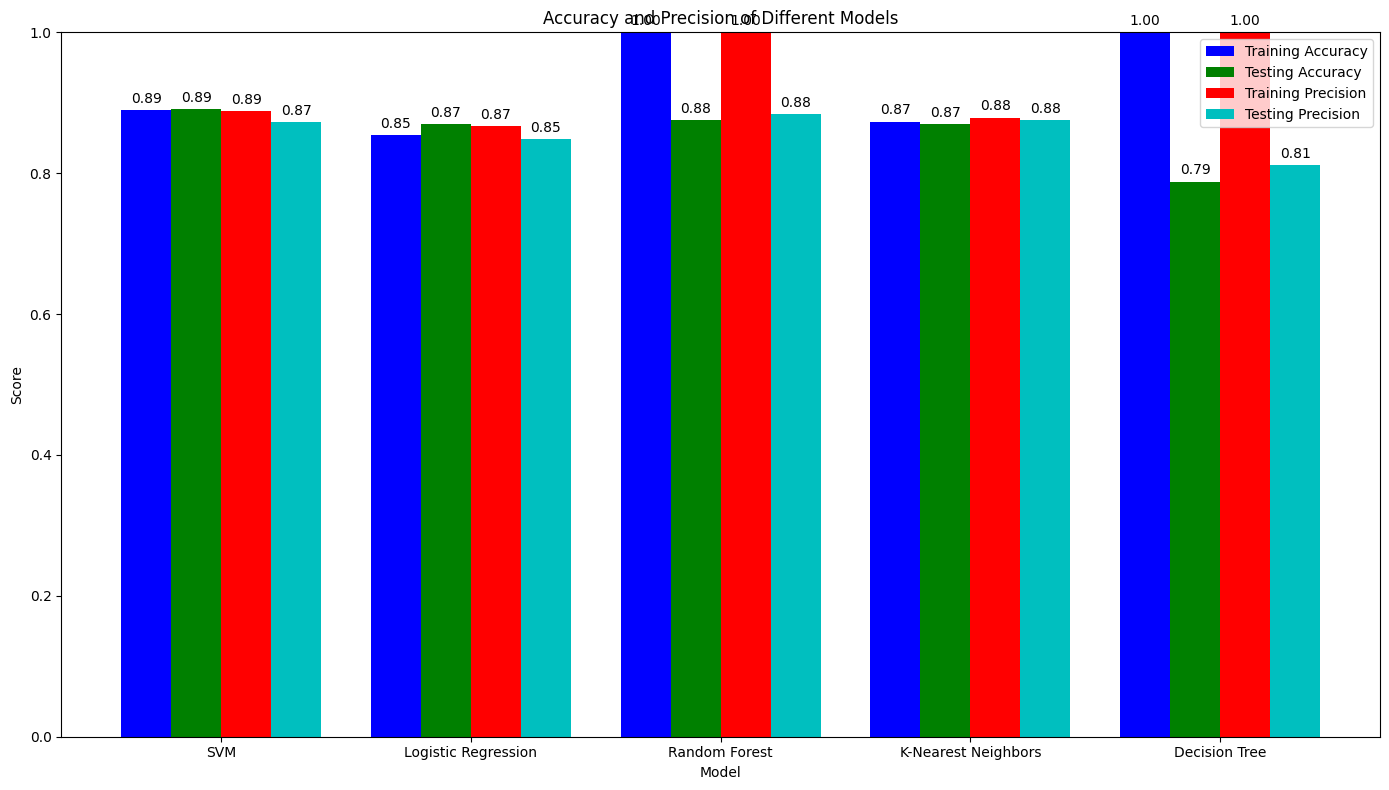

In [52]:
# Initialize models
models = {
    'SVM': SVC(kernel='rbf', random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}


# Train models and calculate accuracies and precisions
accuracies_train = {}
accuracies_test = {}
precisions_train = {}
precisions_test = {}

for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    accuracies_train[name] = accuracy_score(Y_train, Y_train_pred)
    accuracies_test[name] = accuracy_score(Y_test, Y_test_pred)
    precisions_train[name] = precision_score(Y_train, Y_train_pred)
    precisions_test[name] = precision_score(Y_test, Y_test_pred)

# Plot accuracies and precisions
fig, ax = plt.subplots(figsize=(14, 8))

bar_width = 0.2
index = np.arange(len(models))

train_acc_bars = ax.bar(index - bar_width*1.5, accuracies_train.values(), bar_width, label='Training Accuracy', color='b')
test_acc_bars = ax.bar(index - bar_width/2, accuracies_test.values(), bar_width, label='Testing Accuracy', color='g')
train_prec_bars = ax.bar(index + bar_width/2, precisions_train.values(), bar_width, label='Training Precision', color='r')
test_prec_bars = ax.bar(index + bar_width*1.5, precisions_test.values(), bar_width, label='Testing Precision', color='c')

ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Accuracy and Precision of Different Models')
ax.set_xticks(index)
ax.set_xticklabels(models.keys())
ax.set_ylim(0, 1)
ax.legend()

# Add labels on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(train_acc_bars)
add_labels(test_acc_bars)
add_labels(train_prec_bars)
add_labels(test_prec_bars)

plt.tight_layout()
plt.show()

In [53]:
# Initialize the models
logreg_model = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)
dt_model = DecisionTreeClassifier(random_state=42)
svc_model = SVC(probability=True, random_state=42)

# Create the Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('lr', logreg_model),
        ('rf', rf_model),
        ('knn', knn_model),
        ('dt', dt_model),
        ('svc', svc_model)
    ],
    voting='soft'  # Use 'soft' for probability-based voting
)

# Fit the Voting Classifier on the training data
voting_clf.fit(X_train, Y_train)

# Evaluate the Voting Classifier on the training data
y_train_pred = voting_clf.predict(X_train)
train_accuracy = accuracy_score(Y_train, y_train_pred)
train_precision = precision_score(Y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Training Precision: {train_precision:.2f}')

# Evaluate the Voting Classifier on the testing data
y_test_pred = voting_clf.predict(X_test)
test_accuracy = accuracy_score(Y_test, y_test_pred)
test_precision = precision_score(Y_test, y_test_pred)
print(f'Testing Accuracy: {test_accuracy:.2f}')
print(f'Testing Precision: {test_precision:.2f}')

Training Accuracy: 0.96
Training Precision: 0.95
Testing Accuracy: 0.89
Testing Precision: 0.90


In [54]:
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, Y_train)

SVC(random_state=42)

In [55]:
input_data=(-1.433140, 1, 1, 0.410909, 0.825070, 0,	1, 1.382928, 0,	-0.832432, 2)

#change the input data to  a numpy array
input_data_as_array=np.asarray(input_data)

#reshape the numpy array as we are only predicting for one instaance
input_data_reshape=input_data_as_array.reshape(1,-1)

prediction=svm_model.predict(input_data_reshape)

print(prediction)

if (prediction[0]==0):
    print("The person not have heart disease")
else:
    print("the person has heart disease") 

[0]
The person not have heart disease


C:\Users\vinut\Documents\ML_Projects\mlvenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
